In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn import svn

In [550]:
data = pd.read_csv('Loan_default.csv')
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [551]:
data_backup = data

In [552]:
#lets check if there are any null values
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Dividing the data in catagories of people who defaulted the loan and who didn't

In [596]:
#defaulter 
d = data[data.Default==1]
#non-defaulter
nd = data[data.Default == 0]
d

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,EmploymentType,HasCoSigner,Default
2,46,84208,129188,451,26,21.17,Unemployed,No,1
5,25,90298,90448,720,18,22.72,Unemployed,Yes,1
8,36,42053,92357,827,83,23.94,Self-employed,No,1
11,28,149227,139759,375,56,5.84,Full-time,Yes,1
18,19,40718,78515,319,119,14.00,Self-employed,No,1
...,...,...,...,...,...,...,...,...,...
255310,65,111206,112192,315,3,20.17,Unemployed,No,1
255324,50,34641,108855,347,17,11.77,Unemployed,No,1
255333,22,45575,43355,545,99,21.86,Unemployed,No,1
255341,40,129890,116119,701,38,9.91,Part-time,Yes,1


In [554]:
#LoanID doesnt provide any vital information about the person so we will directly remove the column
data.drop(columns=['LoanID'],inplace=True)
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


<Axes: xlabel='MonthsEmployed', ylabel='count'>

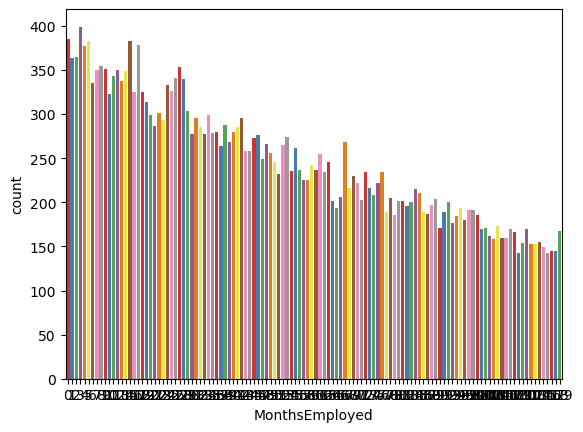

In [555]:
#for defaulters
sns.countplot(x= "MonthsEmployed", data = d, palette = 'Set1')

<Axes: xlabel='MonthsEmployed', ylabel='count'>

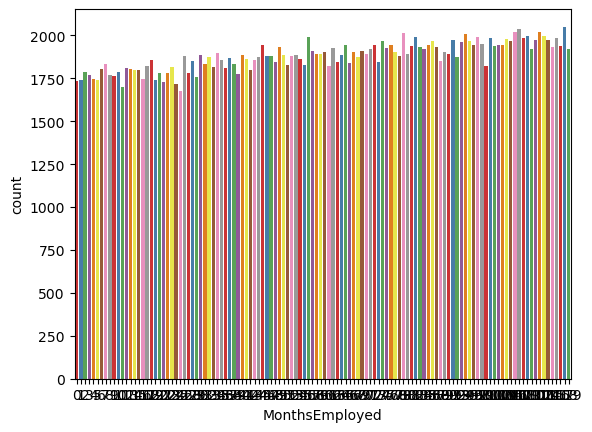

In [556]:
#for non-defaulters
sns.countplot(x= "MonthsEmployed", data = nd, palette = 'Set1')

<Axes: xlabel='NumCreditLines', ylabel='count'>

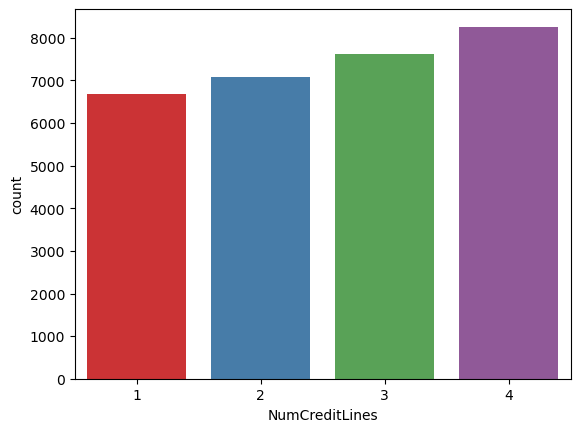

In [557]:
#for defaulters
sns.countplot(x= "NumCreditLines", data = d, palette = 'Set1')

<Axes: xlabel='NumCreditLines', ylabel='count'>

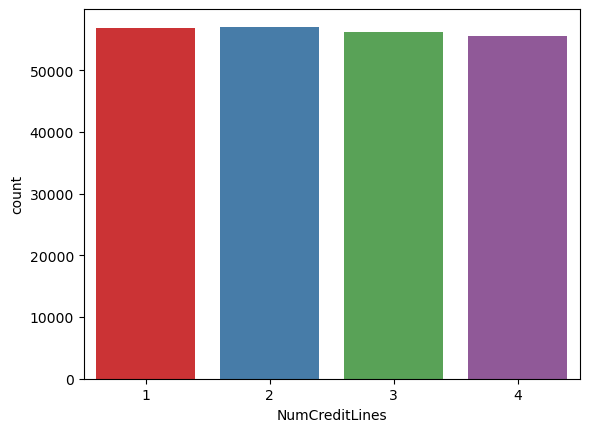

In [558]:
#for non-defaulters
sns.countplot(x= "NumCreditLines", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar credit lines so we are not keeping this feature.

In [559]:
data.drop(columns=['NumCreditLines'],inplace=True)

now lets check for credit lines

In [560]:
#for defaulters
sns.countplot(x= "InterestRate", data = d, palette = 'Set1')

<Axes: xlabel='InterestRate', ylabel='count'>

Error in callback <function flush_figures at 0x00000168023BBB00> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='InterestRate', ylabel='count'>

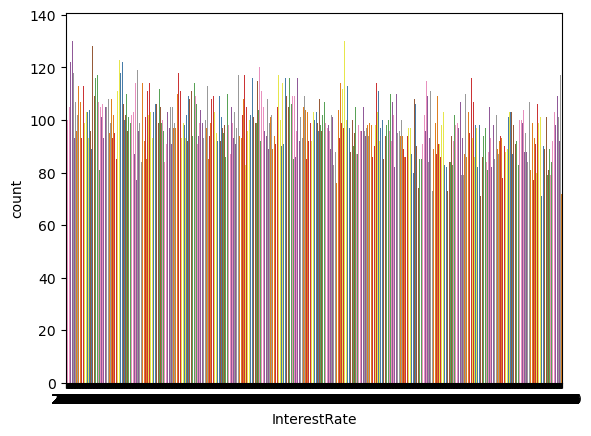

In [561]:
#for non-defaulters
sns.countplot(x= "InterestRate", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters are tending to have more interest rate so we are keeping this feature.

now lets check for Loan Term

<Axes: xlabel='LoanTerm', ylabel='count'>

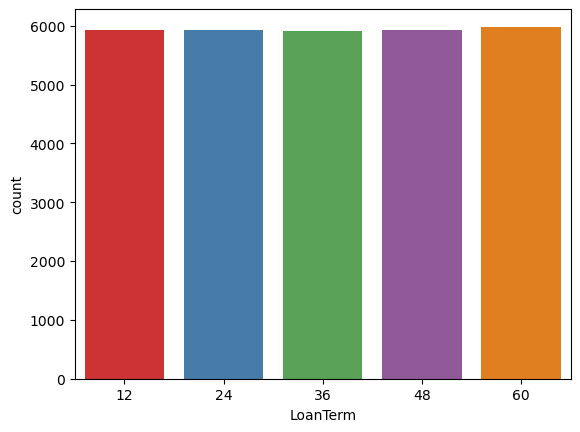

In [562]:
#for defaulters
sns.countplot(x= "LoanTerm", data = d, palette = 'Set1')

<Axes: xlabel='LoanTerm', ylabel='count'>

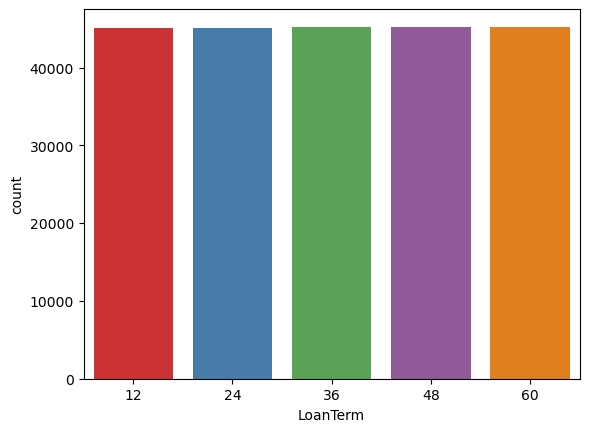

In [563]:
#for non-defaulters
sns.countplot(x= "LoanTerm", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar loan term so we are not keeping this feature.

In [564]:
data.drop(columns=['LoanTerm'],inplace=True)

now lets check for DTI ratio

<Axes: xlabel='DTIRatio', ylabel='count'>

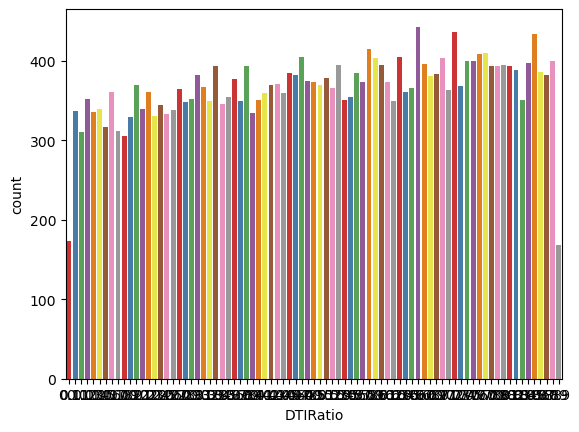

In [565]:
#for defaulters
sns.countplot(x= "DTIRatio", data = d, palette = 'Set1')

<Axes: xlabel='DTIRatio', ylabel='count'>

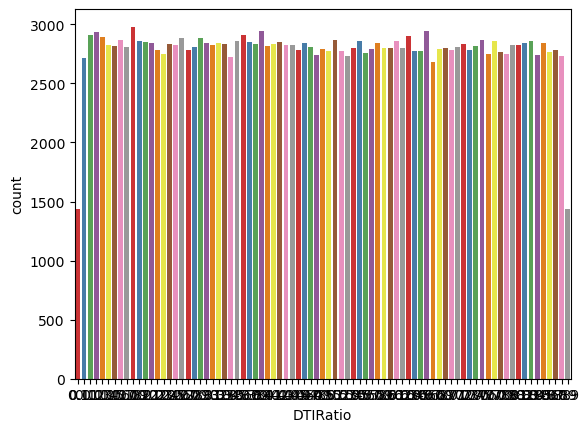

In [566]:
#for non-defaulters
sns.countplot(x= "DTIRatio", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar DTI ratio so we are not keeping this feature.

In [567]:
data.drop(columns=['DTIRatio'],inplace=True)

now lets check for Education

<Axes: xlabel='Education', ylabel='count'>

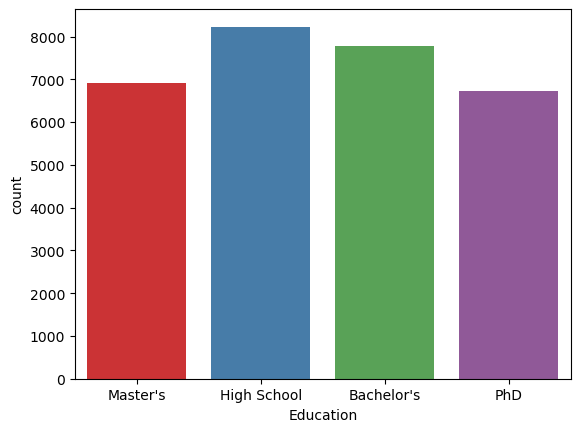

In [568]:
#for defaulters
sns.countplot(x= "Education", data = d, palette = 'Set1')

<Axes: xlabel='Education', ylabel='count'>

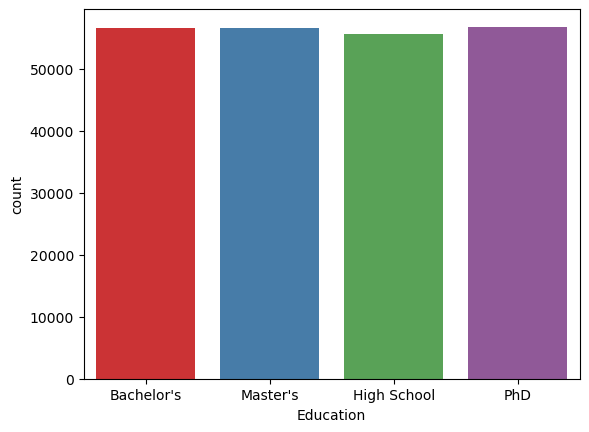

In [569]:
#for non-defaulters
sns.countplot(x= "Education", data = nd, palette = 'Set1')

From the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar education so we are not keeping this feature.

In [570]:
data.drop(columns=['Education'],inplace=True)

now lets check for Employment Type

<Axes: xlabel='EmploymentType', ylabel='count'>

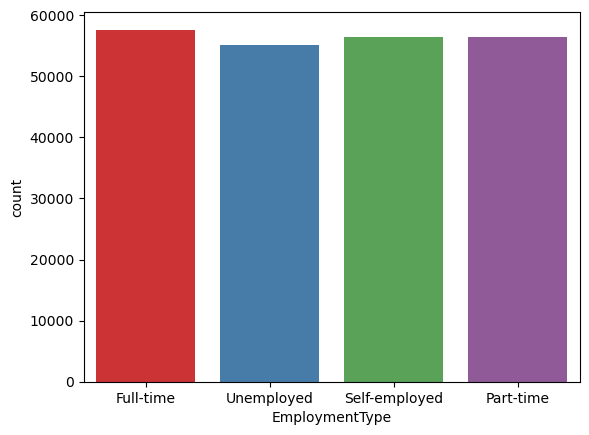

In [571]:
#for non-defaulters
sns.countplot(x= "EmploymentType", data = nd, palette = 'Set1')

<Axes: xlabel='EmploymentType', ylabel='count'>

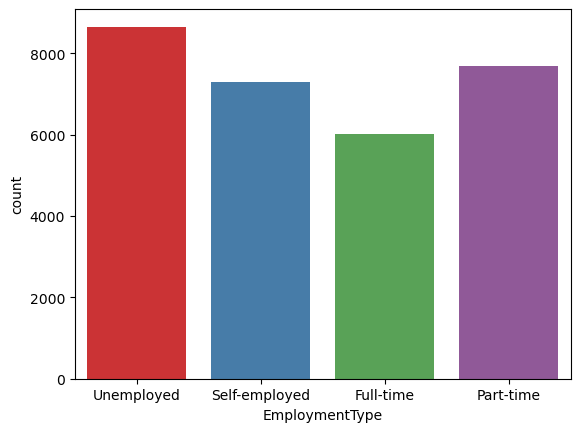

In [572]:
#for defaulters
sns.countplot(x= "EmploymentType", data = d, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters are tending to be more unemployed so we are keeping this feature.

now lets check for Marital Status

<Axes: xlabel='MaritalStatus', ylabel='count'>

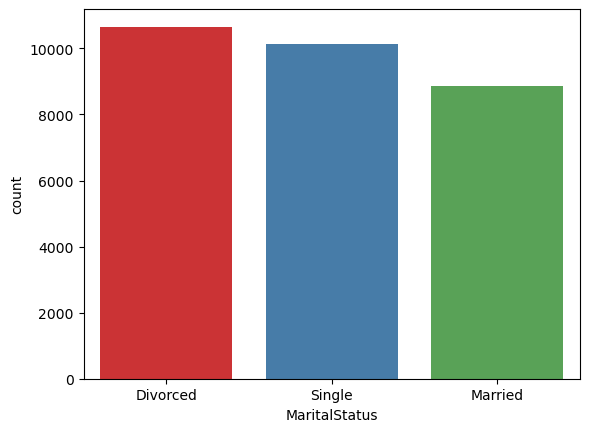

In [573]:
#for defaulters
sns.countplot(x= "MaritalStatus", data = d, palette = 'Set1')

<Axes: xlabel='MaritalStatus', ylabel='count'>

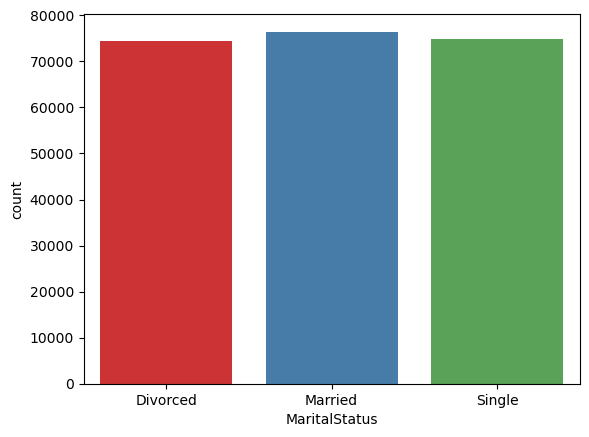

In [574]:
#for non-defaulters
sns.countplot(x= "MaritalStatus", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar marital ststus so we are not keeping this feature.

In [575]:
data.drop(columns=['MaritalStatus'],inplace=True)

now lets check for Has Mortgage

<Axes: xlabel='HasMortgage', ylabel='count'>

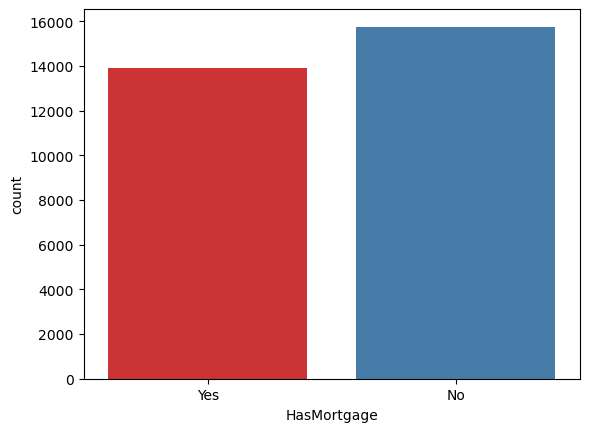

In [576]:
#for defaulters
sns.countplot(x= "HasMortgage", data = d, palette = 'Set1')

<Axes: xlabel='HasMortgage', ylabel='count'>

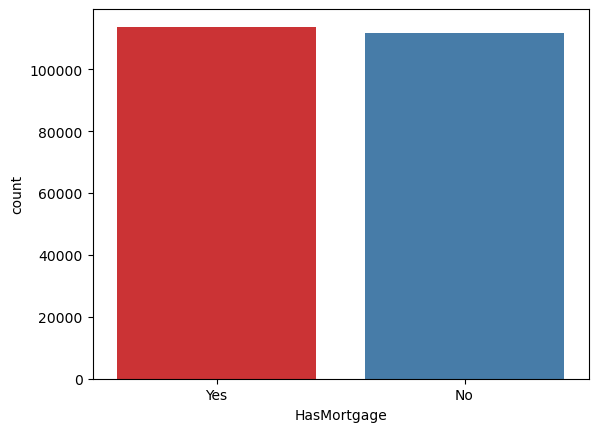

In [577]:
#for non-defaulters
sns.countplot(x= "HasMortgage", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar Mortage so we are not keeping this feature.

In [578]:
data.drop(columns=['HasMortgage'],inplace=True)

now lets check for Has Dependents

<Axes: xlabel='HasDependents', ylabel='count'>

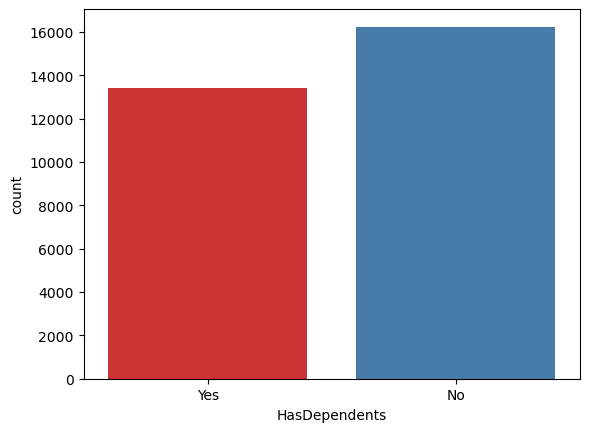

In [579]:
#for defaulters
sns.countplot(x= "HasDependents", data = d, palette = 'Set1')

<Axes: xlabel='HasDependents', ylabel='count'>

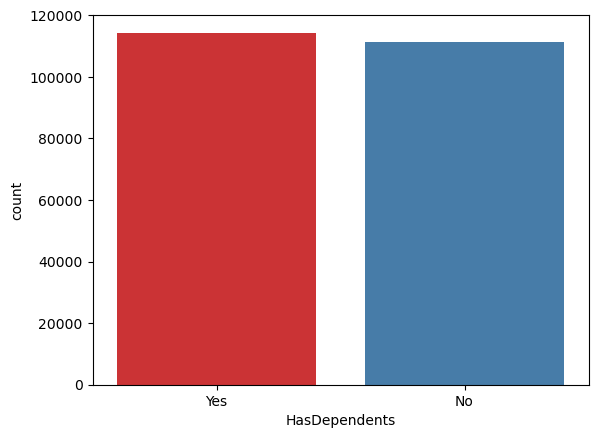

In [580]:
#for non-defaulters
sns.countplot(x= "HasDependents", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar Dependents so we are not keeping this feature.

In [581]:
data.drop(columns=['HasDependents'],inplace=True)

now lets check for Loan Purpose

<Axes: xlabel='LoanPurpose', ylabel='count'>

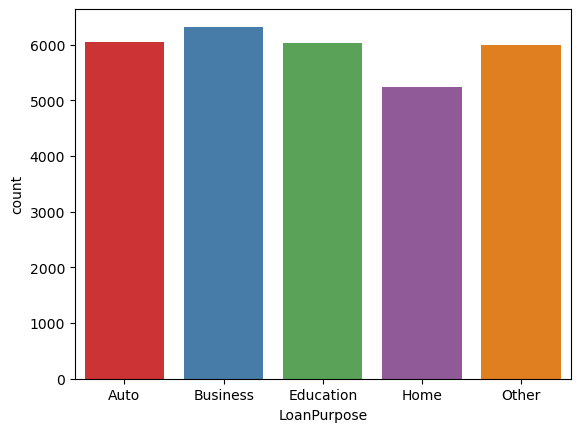

In [582]:
#for defaulters
sns.countplot(x= "LoanPurpose", data = d, palette = 'Set1')

<Axes: xlabel='LoanPurpose', ylabel='count'>

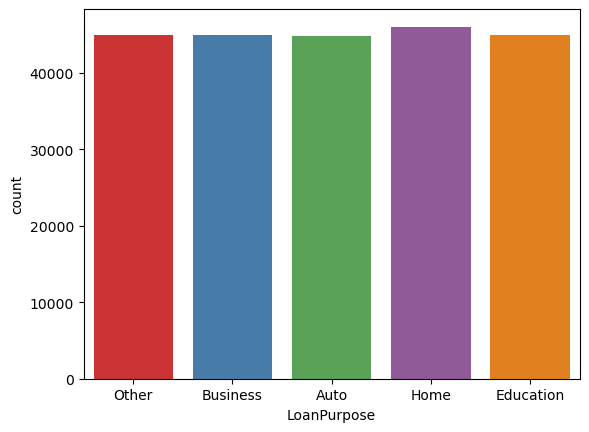

In [583]:
#for non-defaulters
sns.countplot(x= "LoanPurpose", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters and non-defaulters are tending to have similar loan purpose so we are not keeping this feature.

In [584]:
data.drop(columns=['LoanPurpose'],inplace=True)

now lets check for Has Co-Signer

<Axes: xlabel='HasCoSigner', ylabel='count'>

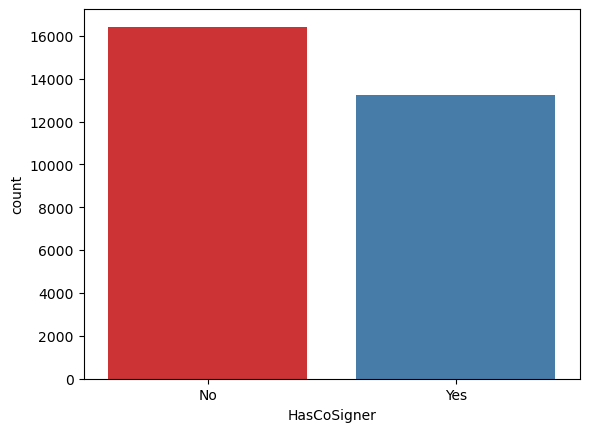

In [585]:
#for defaulters
sns.countplot(x= "HasCoSigner", data = d, palette = 'Set1')

<Axes: xlabel='HasCoSigner', ylabel='count'>

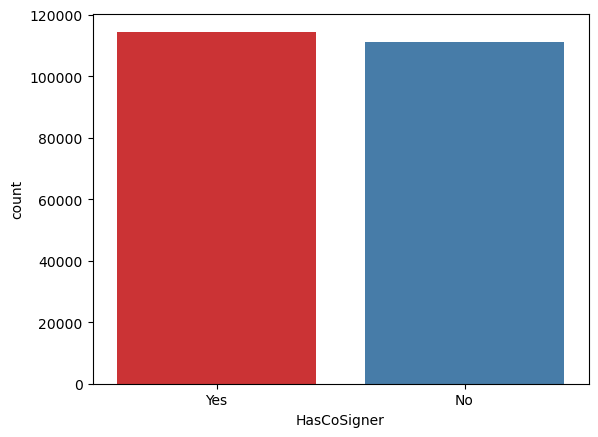

In [586]:
#for non-defaulters
sns.countplot(x= "HasCoSigner", data = nd, palette = 'Set1')

from the above graphs we get to know that the people who are defaulters are tending to not have co-signer so we are keeping this feature.

In [587]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,EmploymentType,HasCoSigner,Default
0,56,85994,50587,520,80,15.23,Full-time,Yes,0
1,69,50432,124440,458,15,4.81,Full-time,Yes,0
2,46,84208,129188,451,26,21.17,Unemployed,No,1
3,32,31713,44799,743,0,7.07,Full-time,No,0
4,60,20437,9139,633,8,6.51,Unemployed,No,0
...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,14.11,Full-time,No,0
255343,32,51953,189899,511,14,11.55,Part-time,No,1
255344,56,84820,208294,597,70,5.29,Self-employed,Yes,0
255345,42,85109,60575,809,40,20.90,Part-time,No,0


In [588]:
#defaulter 
d = data[data.Default==1]
#non-defaulter
nd = data[data.Default == 0]

Default
0    225694
1     29653
Name: count, dtype: int64


<Axes: xlabel='Default', ylabel='count'>

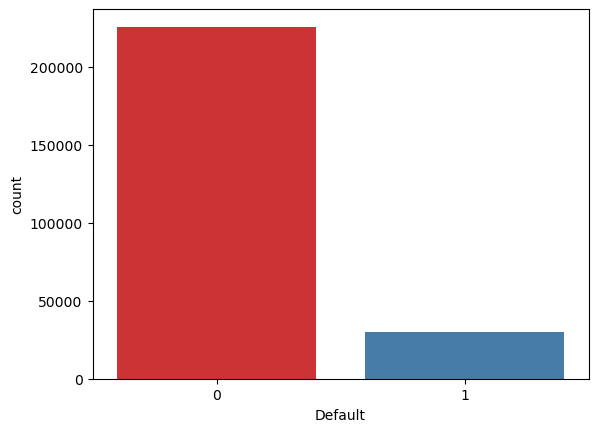

In [589]:
print(data.value_counts("Default"))
sns.countplot(x= "Default", data = data, palette = 'Set1')

as we can see the number of defaulters is about to 11% of the total data so we need to equilize the value of non-defaulters to the defaulters to avoid the baising. 

In [590]:
nd_updated=nd.sample(n=29653)

In [591]:
new_data= pd.concat([nd_updated,d])

In [592]:
new_data = new_data.sample(new_data.shape[0])

In [595]:
new_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,EmploymentType,HasCoSigner,Default
91276,60,64437,106451,506,8,24.88,Part-time,Yes,1
91503,44,92140,122636,303,108,21.87,Unemployed,Yes,0
177548,45,79845,141364,638,79,10.65,Self-employed,Yes,0
229409,42,128267,219337,374,71,3.29,Self-employed,No,0
101368,21,23681,112540,484,39,17.61,Self-employed,No,1
...,...,...,...,...,...,...,...,...,...
97102,41,44312,114699,335,56,15.41,Part-time,No,0
145565,34,124357,29716,310,21,19.51,Full-time,No,1
213457,50,121646,225957,699,10,14.19,Unemployed,No,1
99053,40,148987,210748,836,8,22.54,Self-employed,Yes,0


In [594]:
import pickle
pickle.dump(new_data,open('dataset11.pkl','wb'))
pickle.dump(data,open('dataset21.pkl','wb'))